# Body Fat - Rule of Thumb
#### Group Member: Yanshi Luo, Lan Wang, Peijin Li

## Overall Finding - Rule of Thumb!

$$BODYFAT = -23.99+0.88*ABDOMEN-0.087*WEIGHT-1.28*WRIST$$

### Rule of Thumb

#### 90% of your waist(cm), minus 10% of weight (lbs), minus 130% of your wrist (cm), and minus 24.**

# Example Usage

### For a man who weights 170lb, with waist of 90cm and 15cm wrist.
### his bodyfat rate will be predicted as 17.81%.

There is a 95% probability that his body fat is between 0.10% and 25.67%. 

### With rule of thumb, we get about 24.5% as the predicted bodyfat rate.

### Data Cleaning: KEEP or REPLACE or DELETE?

* Outlier (Not valid record)
* Influential Point (Like extreme values?)

| ID  | Why Abnormal                                         | Action |
|-----|------------------------------------------------------|--------|
| 182 | BodyFat = 0 (failed to be recalculated from Density) | Delete |
| 42  | BMI = 165 (Very Extreme BMI)                         | Delete |
| 39  | Weight = 363.15 (Extreme Fat)                        | Delete |
| 79  | Age = 81 (Extreme Old)                               | Keep   |

## Statistical Model

In [5]:
dat = read.csv("../data/BodyFat.csv")
datset = dat[-c(39,42,182),-c(1,3)]     # Remove IDNO and DENSITY
rg_full = lm(BODYFAT~.,data = datset)

base<-lm(BODYFAT~1,data=datset)
model.AIC<-step(rg_full,direction="backward",k=2,trace = 0)
model.BIC<-step(rg_full,direction="backward",k=log(dim(datset)[1]),trace = 0)

base.AIC<-step(base,direction="both",scope=list(lower=~1,upper=rg_full),trace=0)
base.BIC<-step(base,direction="both",scope=list(lower=~1,upper=rg_full),trace=0,k=log(dim(datset)[1]))

base.AIC.forward<-step(base,direction="forward",scope=list(lower=~1,upper=rg_full),trace=0)
base.BIC.forward<-step(base,direction="forward",scope=list(lower=~1,upper=rg_full),trace=0,k=log(dim(datset)[1]))

# - Variable selection
## stepwise elimination
### forwards, backwards, bidirection

# Criteria
## AIC,BIC



# Result of preselected model.
### forwards results = bidirection results



|model|    method        | number of selected variables |Multiple $R^2$|adjusted $R^2$| Residual standard error |
|-----|------------------|------------------------------|--------------|--------------|-------------------------|
| m1  |backwards (AIC)   |8                             |  0.7433      |0.7347        |3.916                    |
| m2  |backwards (BIC)   |5                             |  0.7354      |0.7299        |3.951                    |
| m3  |bidirectional(AIC)|5                             |  0.7356      |0.7301        |3.95                     |
| m4  |bidirectional(BIC)|3 (ABDOMEN, WEIGHT, WRIST)    |  0.7292      |0.7259        |3.981                    | 


# Inference about relationship 


| variable | Est.coefficient |Std. Error | P-value |
|----------|-----------------|-----------|---------|
|Intercept |     -23.99356   |   6.23603 | 0.000152|
|ABDOMEN   |      0.88476    |  0.05108  |< 2e-16  |
|WEIGHT    |      -0.08678   |   0.02234 |0.000132 |
|WRIST     |      -1.28161   |   0.40274 | 0.001650|

# - Diagnosis
## residual plots, QQ-plot and influential points

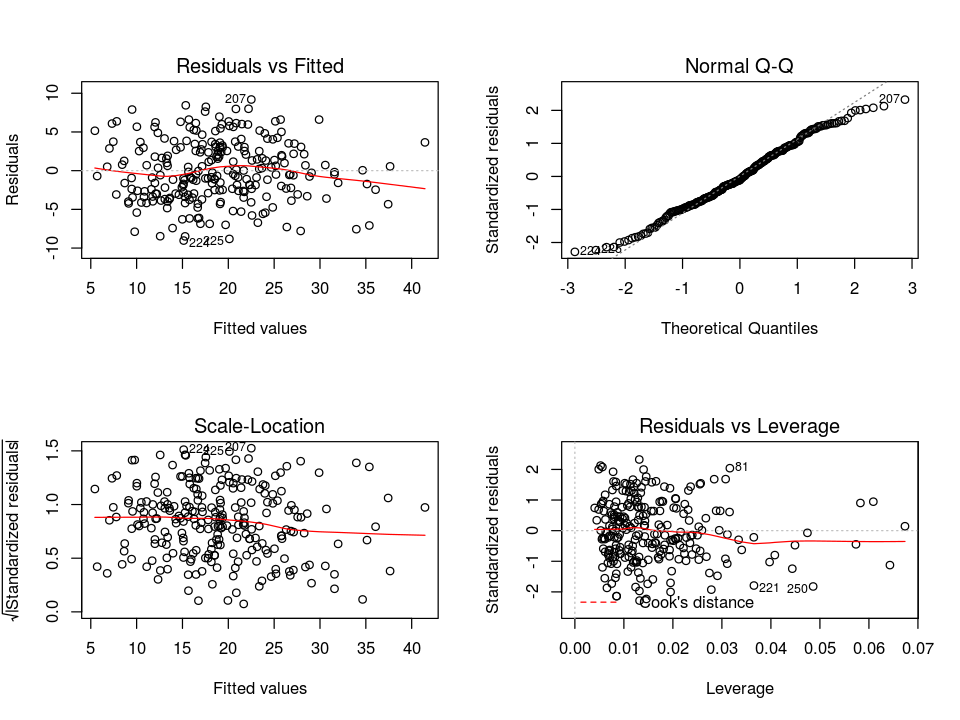

In [8]:
options(repr.plot.width=8, repr.plot.height=6)
par(mfrow = c(2,2))
plot(base.BIC)

![](https://pbs.twimg.com/media/DVKP6P9W0AAutF9.jpg:large)

# Strength

### 1.**Linearity assumption** is reasonable based on previous scatter plots.

### 2.**Normality assumption** about errors is reasonable based on QQ plot, we showed above.

### 3.**Constant variance assumption** is reasonable because residual plots doesn't have an obvious shape.

### 4.**R-square** is larger than 0.7 and there're only 3 indepent variables in the model. This means this model refines most of information in the data and has a very simple form.

### 5.Multivariable linear regression provides **unbiased** estimators of coefficients.


# Weakness : Multicollinearity

## Accuracy of estimator of standard error **&darr;**

## credibility of t-test **&darr;**

### width of confidence interval **&uarr;**


### measurement of multicollinearity :  Variance Inflation Factor (VIF)

|ABDOMEN | WEIGHT | WRITST |
|--------|--------|--------|
|2.045887|2.370198|1.448709|

## Overall, our model is simple and useful, while it's not very precise.

## Reference

Siri, W.E. (1956), "Gross composition of the body", in _Advances in  Biological and Medical Physics_, vol. IV, edited by J.H. Lawrence and C.A. Tobias, Academic Press, Inc., New York.

WHO :: *Global Database on Body Mass Index*, Retrieved February 3, 2018, from http://apps.who.int/bmi/index.jsp?introPage=intro_3.html